# PREPROCESSING

#### # 1. (2 points) Often there are outliers which do not match the overall data type. There is one record in this data where the “Reviews” has value “3.0M” which does not match the rest of the data. Remove that Record.

In [1]:
import pandas as pd

my_data_frame = pd.read_excel('data/GooglePlaystore.xlsx')

#Checking if M string exits in column
print(my_data_frame['Reviews'].str.contains("M").any())


#Printing data frame tuple before the removal
print("Before Removal: ",my_data_frame.shape)

index_list = []
substring = "M"
counter = 0


#If it exists then getting the row index to be removed 
for i in my_data_frame['Reviews']:
    if substring in str(i):
        index_list.append(counter)
    counter += 1

for i in index_list:
    my_data_frame = my_data_frame.drop(my_data_frame.index[i])


#Printing data frame after the removal
print("After Removal: ",my_data_frame.shape)


True
Before Removal:  (10841, 13)
After Removal:  (10840, 13)


#### 2. (2 points) Remove rows where any of the columns has the value “Varies with device”.

In [2]:
header_list = ["App","Category","Rating","Reviews","Size","Installs","Type","Price","Content Rating","Genres","Last Updated","Current Ver","Android Ver"]

index_list = []
substring = "Varies with device"
counter = 0

#Printing data frame tuple before the removal
print("Before Removal: ",my_data_frame.shape)

#If it exists then getting the row index to be removed
for header in header_list:
    for i in my_data_frame[header]:
        if substring in str(i):
            index_list.append(counter)
        counter += 1

    my_data_frame = my_data_frame.drop(my_data_frame.index[index_list])
    index_list.clear()
    counter = 0

#Printing data frame after the removal
print("After Removal: ",my_data_frame.shape)


Before Removal:  (10840, 13)
After Removal:  (9059, 13)


#### 3. (2 points) The values in the Android version column should be floats. Strip the trailing non-numeric characters from all values (ie. the words “ and up”), so the result is a number. If there are multiple decimal places (eg. “x.y.z”), keep only the first two parts (eg “x.y”). For example, the value “4.1 and up” should be changed to “4.1”. The value “4.5.6 and up” should be changed to “4.5”. The value “5.6.7” should be changed to “5.6”. If there is a range (eg. 5.0 – 8.0), only consider the first number. For example, the value “5.0 – 8.0” should be changed to “5.0”. The value “4.0.3 – 7.1.1” should be changed to “4.0”.

In [3]:
substring = "and up"
substring1= "-"
counter = 0


for i in my_data_frame['Android Ver']:
    value = str(i)
    new_substring = value
    if substring in value or  substring1 in value or len(value) == 5:
        new_substring = value[0:3]
    my_data_frame.iloc[[counter],[12]] = new_substring
    counter += 1

#print(my_data_frame['Android Ver'])
my_data_frame

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,"10,000+",Free,0.0,Everyone,Art & Design,2018-01-07 00:00:00,1.0.0,4.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,"5,000,000+",Free,0.0,Everyone,Art & Design,2018-08-01 00:00:00,1.2.4,4.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,2018-06-20 00:00:00,1.1,4.4
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167.0,5.6M,"50,000+",Free,0.0,Everyone,Art & Design,2017-03-26 00:00:00,1.0,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7.0,2.6M,500+,Free,0.0,Everyone,Education,2017-06-18 00:00:00,1.0.0,4.1
10835,FR Forms,BUSINESS,NaN,0.0,9.6M,10+,Free,0.0,Everyone,Business,2016-09-29 00:00:00,1.1.5,4.0
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53M,"5,000+",Free,0.0,Everyone,Education,2017-07-25 00:00:00,1.48,4.1
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3.6M,100+,Free,0.0,Everyone,Education,2018-07-06 00:00:00,1.0,4.1


#### 4. (3 points) The “Installs” column must have integer values. For values that have commas, remove the commas. For values that have a ‘+’ at the end, remove the ‘+’. Keep only those rows that have an integer value after these edits.


In [4]:
counter = 0
new_substring = ""
index_list = []

#Printing data frame tuple before the removal
print("Before Removal: ",my_data_frame.shape)

for i in my_data_frame['Installs']:
    new_substring = str(i).replace(",","")
    if new_substring[len(new_substring)-1] == '+':
        new_substring = new_substring.replace("+","")

    if new_substring == "NaN":
        index_list.append(counter)
    my_data_frame.iloc[[counter],[5]] = new_substring
    new_substring = ""
    counter += 1


my_data_frame = my_data_frame.drop(my_data_frame.index[index_list])

#Printing data frame after the removal
print("After Removal: ",my_data_frame.shape)
#print(my_data_frame['Installs'])
my_data_frame

Before Removal:  (9059, 13)
After Removal:  (9059, 13)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,10000,Free,0.0,Everyone,Art & Design,2018-01-07 00:00:00,1.0.0,4.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,5000000,Free,0.0,Everyone,Art & Design,2018-08-01 00:00:00,1.2.4,4.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20 00:00:00,1.1,4.4
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167.0,5.6M,50000,Free,0.0,Everyone,Art & Design,2017-03-26 00:00:00,1.0,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10834,FR Calculator,FAMILY,4.0,7.0,2.6M,500,Free,0.0,Everyone,Education,2017-06-18 00:00:00,1.0.0,4.1
10835,FR Forms,BUSINESS,NaN,0.0,9.6M,10,Free,0.0,Everyone,Business,2016-09-29 00:00:00,1.1.5,4.0
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53M,5000,Free,0.0,Everyone,Education,2017-07-25 00:00:00,1.48,4.1
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3.6M,100,Free,0.0,Everyone,Education,2018-07-06 00:00:00,1.0,4.1


#### 5. (3 points) For missing rating values, if the number of reviews is less than 100 and installations is less than 50000, remove the row. Else, fill the missing value with the average value (rounded to 2 decimal places) for the Category of that row


In [5]:
#Checking if column has any null vlaue
print(my_data_frame['Reviews'].isnull().any())

average_rating = round(my_data_frame['Rating'].mean(),2)


counter = 0
new_substring = ""
index_list = []

#Printing data frame tuple before the removal
print("Before Removal: ",my_data_frame.shape)

for i in my_data_frame['Rating']:
    new_substring = str(i)
    if new_substring == "nan":
        if counter < my_data_frame.shape[0]:
            review_value = int(my_data_frame.iloc[counter]['Reviews'])
            install_value = int(my_data_frame.iloc[counter]['Installs'])
            if review_value < 100 and install_value < 50000:
                index_list.append(counter)
            else:
                 my_data_frame.iloc[[counter],[2]] = average_rating
    counter += 1


my_data_frame = my_data_frame.drop(my_data_frame.index[index_list])

#Printing data frame after the removal
print("After Removal: ",my_data_frame.shape)
#print(my_data_frame['Rating'])


False
Before Removal:  (9059, 13)
After Removal:  (7685, 13)


#### 6. (3 points) In Size column, convert “M” (millions) and “K” (thousands) values into integers. For instance, 8.7M should be converted to 8700000 and 2.4K should be converted to 2400.

In [6]:
counter = 0
new_substring = ""

for i in my_data_frame['Size']:
    value = str(i)
    integer_value = float(value[0:2])
    symbol = value[len(value)-1]
    
    if symbol == "M":
        new_substring = str(integer_value * 1000000)
    elif symbol == "K":
        new_substring = str(integer_value * 1000)
    my_data_frame.iloc[[counter],[4]] = new_substring
    counter += 1
    new_substring = ""

#print(my_data_frame['Size'])
my_data_frame

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07 00:00:00,1.0.0,4.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15 00:00:00,2.0.0,4.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8000000.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01 00:00:00,1.2.4,4.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2000000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20 00:00:00,1.1,4.4
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167.0,5000000.0,50000,Free,0.0,Everyone,Art & Design,2017-03-26 00:00:00,1.0,2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10832,FR Tides,WEATHER,3.8,1195.0,,100000,Free,0.0,Everyone,Weather,2014-02-16 00:00:00,6.0,2.1
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44.0,,1000,Free,0.0,Everyone,Books & Reference,2014-03-23 00:00:00,0.8,2.2
10834,FR Calculator,FAMILY,4.0,7.0,2000000.0,500,Free,0.0,Everyone,Education,2017-06-18 00:00:00,1.0.0,4.1
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53000000.0,5000,Free,0.0,Everyone,Education,2017-07-25 00:00:00,1.48,4.1


# ANALYSIS

#### 1. (2 points) Describe (use DataFrame describe method) the category-wise rating statistics.  In other words, for each category, describe the statistics (count, mean, etc.) for ratings in that category.

In [7]:
category_list = []
category_list_dataframe = []
header_list = ["App","Category","Rating","Reviews","Size","Installs","Type","Price","Content Rating","Genres","Last Updated","Current Ver","Android Ver"]


counter = 0
new_substring = ""

for i in my_data_frame['Category']:
    value = str(i)
    #Extracting each category
    if value not in category_list:
        category_list.append(value)
        category_list_dataframe.append(pd.DataFrame(columns = header_list))

for i in my_data_frame['Category']:
    value = str(i)
    #Getting row data according to each category so that we could use describe() on them later
    if value in category_list:
        new_dataframe = category_list_dataframe[category_list.index(value)]
        new_dataframe.loc[len(new_dataframe.index)] = my_data_frame.iloc[counter]
        category_list_dataframe[category_list.index(value)] = new_dataframe
    counter += 1

counter = 0
#Printing each category wise 
for category_wise_dataframes in category_list_dataframe:
    print("CATEGORY: ",category_list[counter])
    print(category_wise_dataframes["Rating"].describe(datetime_is_numeric=True))
    print()
    counter += 1





CATEGORY:  ART_AND_DESIGN
count    59.000000
mean      4.355424
std       0.366146
min       3.200000
25%       4.100000
50%       4.400000
75%       4.700000
max       5.000000
Name: Rating, dtype: float64

CATEGORY:  AUTO_AND_VEHICLES
count    62.000000
mean      4.146774
std       0.569935
min       2.100000
25%       3.900000
50%       4.250000
75%       4.500000
max       4.900000
Name: Rating, dtype: float64

CATEGORY:  BEAUTY
count    40.000000
mean      4.282750
std       0.357656
min       3.100000
25%       4.075000
50%       4.300000
75%       4.525000
max       4.900000
Name: Rating, dtype: float64

CATEGORY:  BOOKS_AND_REFERENCE
count    147.000000
mean       4.317075
std        0.453584
min        2.700000
25%        4.100000
50%        4.400000
75%        4.600000
max        5.000000
Name: Rating, dtype: float64

CATEGORY:  BUSINESS
count    246.000000
mean       4.119390
std        0.662594
min        1.000000
25%        3.825000
50%        4.300000
75%        4.500000


#### 2. Extract all “Free” apps from the master data frame. Then write a function that, given a numeric column e.g, 'Rating', will create and return a dataframe for the top 3 free applications in each category based on that column. Call the function on each of these columns:




#### (a) Rating (gives 3 most highly rated applications in each category)

#### (b) Installs (gives 3 most installed applications in each category)

#### (c) Reviews (gives 3 most reviewed applications in each category)

#### You don’t need to do anything explicit to break ties. Each of the returned dataframes have Category and App for the first two columns, and one of Rating (for (a)), Installs (for (b)), and Re- views (for (c)) as the third column.

In [8]:
# extract free apps
free = my_data_frame[my_data_frame['Price']==0.0]

In [9]:
def top3(col):
    return free[['Category','App',col]].sort_values(by=col, ascending=False).head(n=3)

In [10]:
top3('Rating')

,Category,App,Rating
10837,FAMILY,Fr. Mike Schmitz Audio Teachings,5.0
9246,TOOLS,Victoria EC,5.0
9411,BUSINESS,NEMA ei,5.0


In [11]:
top3('Installs')

,Category,App,Installs
5596,HEALTH_AND_FITNESS,Samsung Health,500000000
1662,GAME,Pou,500000000
1885,GAME,Pou,500000000


In [12]:
top3('Reviews')

,Category,App,Reviews
1879,GAME,Clash of Clans,44893888.0
1704,GAME,Clash of Clans,44891723.0
1670,GAME,Clash of Clans,44891723.0


#### 3. (3 points) Find the average, maximum and minimum price of the paid Applications.

In [13]:
counter = 0
new_substring = ""
index_list = []
average = 0
min_value = 0
max_value = 0
my_sum = 0
entry_count = 0

for i in my_data_frame['Type']:
    new_substring = str(i)
    if new_substring == "Paid":
        price = float(my_data_frame.iloc[counter]['Price'])
        entry_count += 1
        if counter != 0:
            my_sum += price
            if price > max_value:
                max_value = price
            elif price <= min_value:
                min_value = price
        else:
            min_value = price
            max_value = price
            my_sum += price
          
    counter += 1

print("```````````Paid Apps Details```````````````````")
print("Average: $%s" % round((my_sum/entry_count),2))
print("Min Value: $%s" % min_value)
print("Max Value: $%s" % max_value)



```````````Paid Apps Details```````````````````
Average: $15.14
Min Value: $0
Max Value: $400.0


# VISUALIZATION

#### 1. In the genre column, break the string of genres into a list. For example, ‘Art & Design; Creativity’ should be [‘Art & Design’, ‘Creativity’]. Count the number of applications per genre and display it using a pie chart. Hint: See DataFrame.explode()

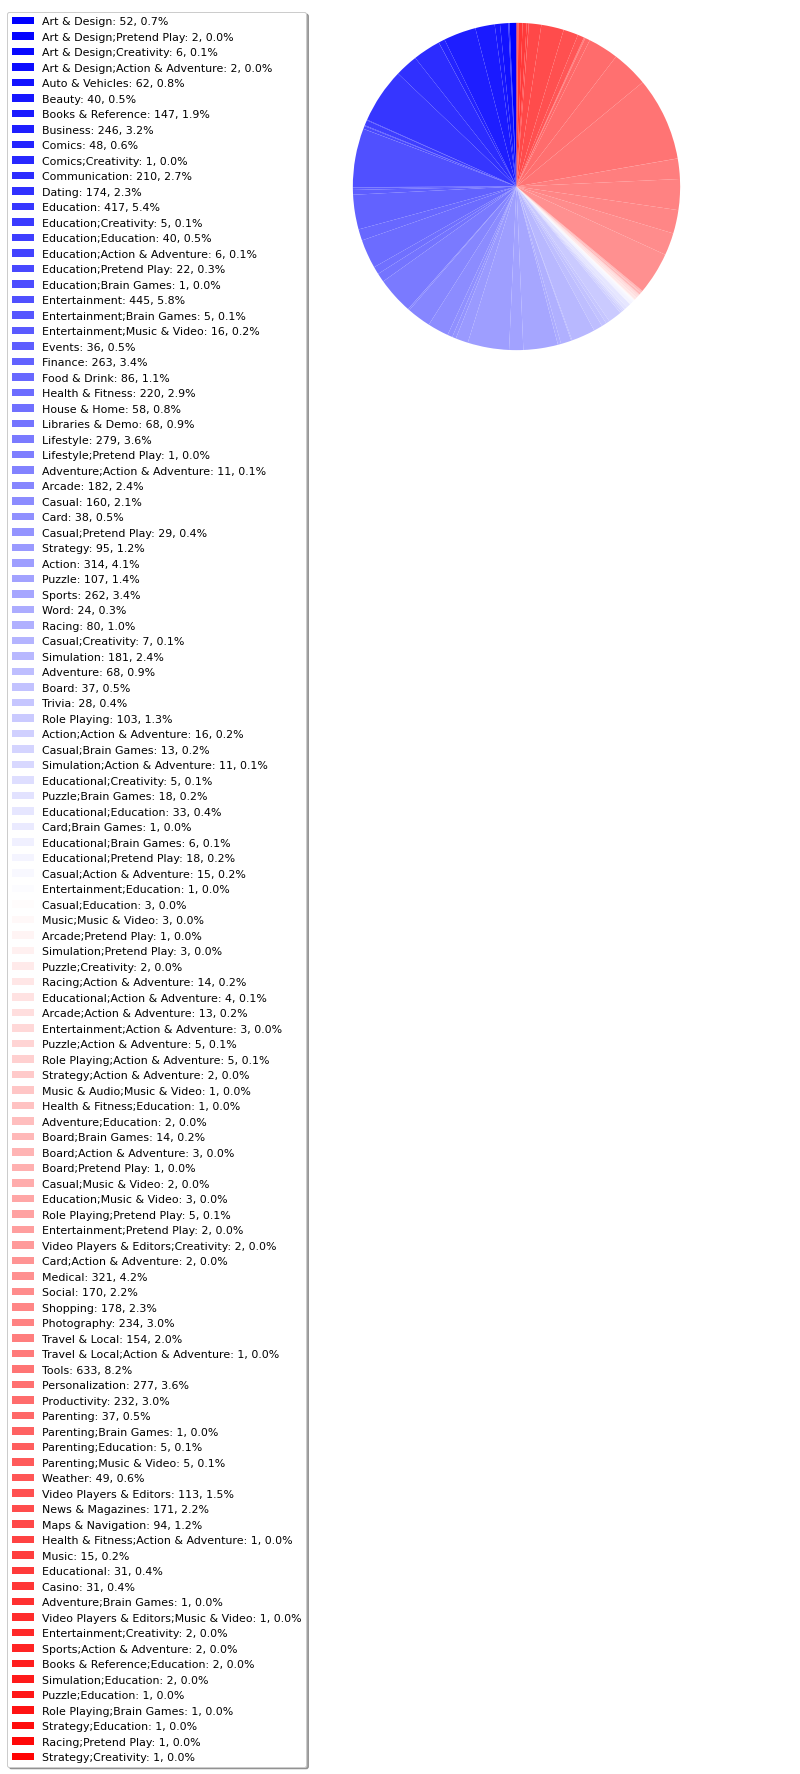

In [14]:
import matplotlib.pyplot as plt


genres_list = []
genres_list_count = []
value = ""
new_value = ""

for i in my_data_frame['Genres']:
    value = str(i)
    if "," in value:
        new_value = value.split(",")
    else:
        new_value = value
    
    if type(new_value) == list:
        for j in new_value:
            #Extracting each genre
            if j not in genres_list:
                genres_list.append(j)
    else:    
        #Extracting each genre
        if new_value not in genres_list:
            genres_list.append(new_value)


for i in range(0,len(genres_list)):
    genres_list_count.append(0)


for i in my_data_frame['Genres']:
    value = str(i)

    if "," in value:
        new_value = value.split(",")
    else:
        new_value = value
    
    if type(new_value) == list:
        for j in new_value:
            #Extracting each genre
            if j in genres_list:
                new_count = genres_list_count[genres_list.index(j)]
                new_count += 1
                genres_list_count[genres_list.index(j)] = new_count
    else:    
        #Extracting each genre
        if new_value in genres_list:
            new_count = genres_list_count[genres_list.index(new_value)]
            new_count += 1
            genres_list_count[genres_list.index(new_value)] = new_count


labels = []
count  = 0 
for i in genres_list:
    new_string = genres_list[count] + ": " + str(genres_list_count[count])
    labels.append(new_string)
    count += 1

# labels = ["%s: %s" % j,i for i in genres_list_count, for j in genres_list]

fig1, ax1 = plt.subplots(figsize=(11, 5))
fig1.subplots_adjust(0.3,0,1,1)


theme = plt.get_cmap('bwr')
ax1.set_prop_cycle("color", [theme(1. * i / len(genres_list_count)) for i in range(len(genres_list_count))])

_, _ = ax1.pie(genres_list_count, startangle=90)

ax1.axis('equal')

total = sum(genres_list_count)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels, genres_list_count)],
    prop={'size': 11},
    bbox_to_anchor=(0.0, 1),
    bbox_transform=fig1.transFigure,
    shadow = True
    
)

plt.show()



#### 2. Display a box plot of ratings for “Business” and “Education” categories. The boxplots should be in the same plot

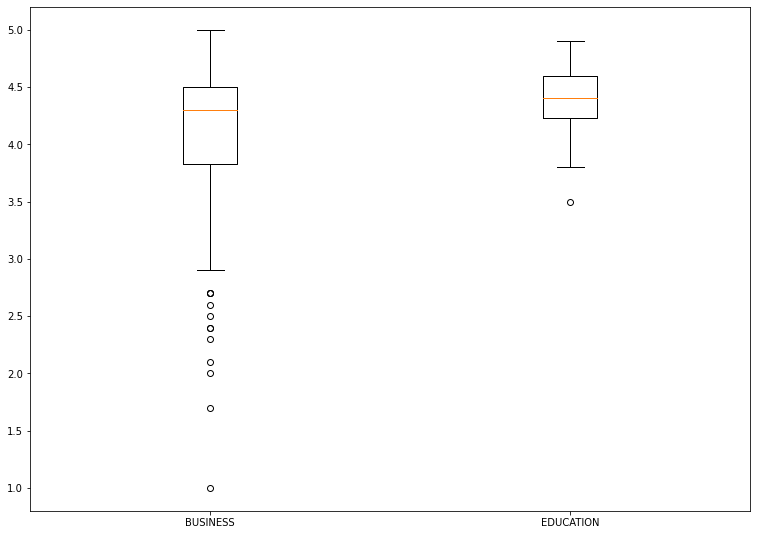

In [15]:
import matplotlib.pyplot as plt

category_list = []
category_list_dataframe = []
header_list = ["App","Category","Rating","Reviews","Size","Installs","Type","Price","Content Rating","Genres","Last Updated","Current Ver","Android Ver"]


counter = 0
new_substring = ""

for i in my_data_frame['Category']:
    value = str(i)
    #Extracting each category
    if value not in category_list:
        category_list.append(value)
        category_list_dataframe.append(pd.DataFrame(columns = header_list))

for i in my_data_frame['Category']:
    value = str(i)
    #Getting row data according to each category so that we could use describe() on them later
    if value in category_list:
        new_dataframe = category_list_dataframe[category_list.index(value)]
        new_dataframe.loc[len(new_dataframe.index)] = my_data_frame.iloc[counter]
        category_list_dataframe[category_list.index(value)] = new_dataframe
    counter += 1

counter = 0
business_ratings_list = []
education_ratings_list = []
#Printing each category wise 
for category_wise_dataframes in category_list_dataframe:
    if category_list[counter] == "BUSINESS":
        business_ratings_list = category_wise_dataframes["Rating"]
    elif category_list[counter] == "EDUCATION":
        education_ratings_list = category_wise_dataframes["Rating"]
    counter += 1


data = [business_ratings_list, education_ratings_list]

fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data)

ax.set_xticklabels(["BUSINESS","EDUCATION"])
 
# show plot
plt.show()